**P-3.56** Perform an experimental analysis that compares the relative running times
of the functions shown in Code Fragment 3.10.

In [ ]:
import time

def prefix_ave_1(S):
    n = len(S)
    A = [0] * n
    for j in range(n):
        total = 0
        for i in range(j + 1):
            total += S[i]
        A[j] = total / (j + 1)
    return A

def prefix_ave_2(S):
    n = len(S)
    A = [0] * n
    total = 0
    for j in range(n):
        total += S[j]
        A[j] = total / (j + 1)
    return A

def measure_time(func, *args):
  start = time.time()
  func(*args)
  end = time.time()
  return end - start

sizes = [10, 100, 1000, 10000]
results = []

for n in sizes:
  data = list(range(n))
  time_1 = measure_time(prefix_ave_1, data)
  time_2 = measure_time(prefix_ave_2, data)
  results.append((n, time_1, time_2))

for result in results:
  print(f"Size: {result[0]}, Time for prefix_ave_1: {result[1]:.6f} seconds, Time for prefix_ave_2: {result[2]:.6f} seconds")



Size: 10, Time for prefix_ave_1: 0.000010 seconds, Time for prefix_ave_2: 0.000004 seconds
Size: 100, Time for prefix_ave_1: 0.000367 seconds, Time for prefix_ave_2: 0.000014 seconds
Size: 1000, Time for prefix_ave_1: 0.045979 seconds, Time for prefix_ave_2: 0.000166 seconds
Size: 10000, Time for prefix_ave_1: 4.062263 seconds, Time for prefix_ave_2: 0.001734 seconds


**P-3.57** Perform experimental analysis to test the hypothesis that Python's sorted method runs in O(*n* log*n*) time on average.

n = 100, time = 0.000019 seconds
n = 1000, time = 0.000175 seconds
n = 5000, time = 0.001687 seconds
n = 10000, time = 0.002393 seconds
n = 20000, time = 0.005294 seconds
n = 50000, time = 0.018155 seconds
n = 100000, time = 0.032044 seconds
n = 200000, time = 0.161149 seconds
n = 500000, time = 0.792969 seconds
n = 1000000, time = 1.309578 seconds


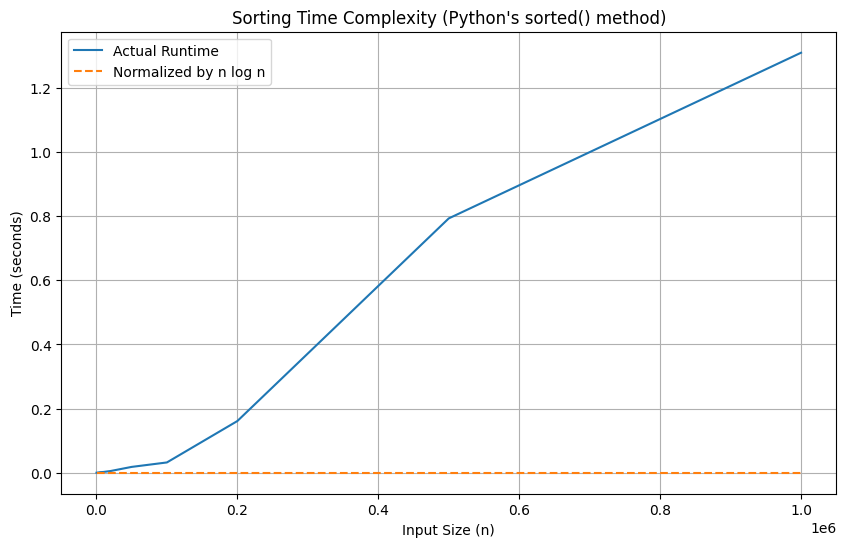

In [ ]:
import time
import random
import matplotlib.pyplot as plt
import math

def run_experiment():
    ns = [100, 1000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
    times = []
    for n in ns:
        arr = [random.randint(1, 10 * n) for _ in range(n)]
        start = time.time()
        sorted(arr)
        end = time.time()
        times.append(end - start)
        print(f"n = {n}, time = {times[-1]:.6f} seconds")
    return ns, times

ns, times = run_experiment()

plt.figure(figsize=(10, 6))
plt.plot(ns, times, label='Actual Runtime')
plt.plot(ns, [t / (n * math.log(n)) for t, n in zip(times, ns)], label='Normalized by n log n', linestyle='--')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title("Sorting Time Complexity (Python's sorted() method)")
plt.legend()
plt.grid(True)
plt.show()